# 0. Setup Paths

In [1]:
import os
!cat /etc/os-release
!uname -m
import tensorflow as tf
print(tf.__version__)

NAME="Ubuntu"
VERSION="20.04.5 LTS (Focal Fossa)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 20.04.5 LTS"
VERSION_ID="20.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=focal
UBUNTU_CODENAME=focal
x86_64


2023-09-14 21:51:42.623960: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0


In [2]:
CUSTOM_MODEL_NAME = 'my_Faster_R-CNN_Inception_ResNet_V2_1024x1024' 
PRETRAINED_MODEL_NAME = 'faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# clone tensorflow model API https://github.com/tensorflow/models.git
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
!apt-get install protobuf-compiler -y
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libprotobuf-dev libprotobuf-lite17 libprotobuf17 libprotoc17
The following NEW packages will be installed:
  libprotobuf-dev libprotobuf-lite17 libprotobuf17 libprotoc17
  protobuf-compiler
0 upgraded, 5 newly installed, 0 to remove and 96 not upgraded.
Need to get 2760 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotobuf-lite17 amd64 3.6.1.3-2ubuntu5.2 [132 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotobuf17 amd64 3.6.1.3-2ubuntu5.2 [798 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotoc17 amd64 3.6.1.3-2ubuntu5.2 [646 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libprotobuf-dev amd64 3.6.1.3-2ubuntu5.2 [1156 kB]
Get:5 http://archive.ubuntu.com/ubuntu 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 102.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 43.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 49.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 112.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 80.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.0/619.0 kB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 108.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 133.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 64.6 MB/s eta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 94.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 130.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 103.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 115.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 40.3 MB/s eta 0:00:00


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696994 sha256=c19cb207c37a321b4a38ee573db2ba7fbd5ce471f11047cdd4730f3dca4a1c17
  Stored in directory: /tmp/pip-ephem-wheel-cache-kjk192kk/wheels/4e/dc/ef/bedf2bfbde4066a6000260cee7f357cca24bd684c6dfebb4aa
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py3-none-any.whl size=44008 sha256=395a0594b02fe1fe0e8e625cfd3989551fb6783f2b912a893c95d048ded4e3b4
  Stored in directory: /root/.cache/pip/wheels/b0/49/56/bc5c2dc656062f0d08924771916c67e3202b6d2c415dcb7398
  Created wheel for crcmod: filename=crcmod-1.7-cp38-cp38-linux_x86_64.whl size=36028 sha256=e7995232ebb509af74f21521fd061a5e90c43b6b315fa49bb3a30ec0d6043024
  Stored in directory: /root/.cache/pip/wheels/f2/92/c3/6adef042a5224686e4ebdb9389aa568f1943c67abd8e05f7b9
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78542 sha256=71afc5a315288a13f6aad70ae0706d0f13c1bcfdf57ad2c91fe196097ff1cd83
  Stored in directory

In [33]:
import object_detection
import tensorflow as tf
print(tf.__version__)
print(object_detection.__file__)

2.13.0
/usr/local/lib/python3.8/dist-packages/object_detection/__init__.py


In [8]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-09-10 11:26:14.034599: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-10 11:26:18.126572: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Running tests under Python 3.8.10: /usr/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0910 11:26:18.200967 140454162732864 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a fu

I0910 11:26:23.714137 140454162732864 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b0
I0910 11:26:23.714293 140454162732864 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 64
I0910 11:26:23.714347 140454162732864 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 3
I0910 11:26:23.717256 140454162732864 efficientnet_model.py:143] round_filter input=32 output=32
I0910 11:26:23.743104 140454162732864 efficientnet_model.py:143] round_filter input=32 output=32
I0910 11:26:23.743224 140454162732864 efficientnet_model.py:143] round_filter input=16 output=16
I0910 11:26:23.815153 140454162732864 efficientnet_model.py:143] round_filter input=16 output=16
I0910 11:26:23.815290 140454162732864 efficientnet_model.py:143] round_filter input=24 output=24
I0910 11:26:23.999292 140454162732864 efficientnet_model.py:143] round_filter input=24 output=24
I0910 11:26:23.999439 140

I0910 11:26:27.669104 140454162732864 efficientnet_model.py:143] round_filter input=16 output=16
I0910 11:26:27.669236 140454162732864 efficientnet_model.py:143] round_filter input=24 output=24
I0910 11:26:27.916657 140454162732864 efficientnet_model.py:143] round_filter input=24 output=24
I0910 11:26:27.916809 140454162732864 efficientnet_model.py:143] round_filter input=40 output=48
I0910 11:26:28.182071 140454162732864 efficientnet_model.py:143] round_filter input=40 output=48
I0910 11:26:28.182231 140454162732864 efficientnet_model.py:143] round_filter input=80 output=88
I0910 11:26:28.822099 140454162732864 efficientnet_model.py:143] round_filter input=80 output=88
I0910 11:26:28.822254 140454162732864 efficientnet_model.py:143] round_filter input=112 output=120
I0910 11:26:29.182876 140454162732864 efficientnet_model.py:143] round_filter input=112 output=120
I0910 11:26:29.183030 140454162732864 efficientnet_model.py:143] round_filter input=192 output=208
I0910 11:26:29.654639 14

I0910 11:26:34.369412 140454162732864 efficientnet_model.py:143] round_filter input=112 output=160
I0910 11:26:34.369614 140454162732864 efficientnet_model.py:143] round_filter input=192 output=272
I0910 11:26:35.149170 140454162732864 efficientnet_model.py:143] round_filter input=192 output=272
I0910 11:26:35.149361 140454162732864 efficientnet_model.py:143] round_filter input=320 output=448
I0910 11:26:35.345110 140454162732864 efficientnet_model.py:143] round_filter input=1280 output=1792
I0910 11:26:35.387808 140454162732864 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.4, depth_coefficient=1.8, resolution=380, dropout_rate=0.4, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

I0910 11:26:44.027840 140454162732864 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b7
I0910 11:26:44.028006 140454162732864 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 384
I0910 11:26:44.028057 140454162732864 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 8
I0910 11:26:44.030233 140454162732864 efficientnet_model.py:143] round_filter input=32 output=64
I0910 11:26:44.050162 140454162732864 efficientnet_model.py:143] round_filter input=32 output=64
I0910 11:26:44.050275 140454162732864 efficientnet_model.py:143] round_filter input=16 output=32
I0910 11:26:44.338291 140454162732864 efficientnet_model.py:143] round_filter input=16 output=32
I0910 11:26:44.338464 140454162732864 efficientnet_model.py:143] round_filter input=24 output=48
I0910 11:26:44.966957 140454162732864 efficientnet_model.py:143] round_filter input=24 output=48
I0910 11:26:44.967131 14

In [7]:
!pip list

Package                       Version
----------------------------- --------------------------
absl-py                       1.0.0
apache-beam                   2.49.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
astunparse                    1.6.3
attrs                         22.2.0
avro-python3                  1.10.2
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        6.0.0
cachetools                    5.2.0
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.0.1
clang                         13.0.1
click                         8.1.3
cloudpickle                   2.2.1
colorama                      0.4.6
comm                          0.1.4
contextlib2                   21.6.0
contourpy                     1.0.6
crcmod                        1.7
cubinlinker                   0.2.2+2.g8e13447
cuda-python        

In [8]:
# download pretained model - faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8
!wget {PRETRAINED_MODEL_URL}
!mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-09-14 21:52:23--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.209.144, 2a00:1450:4005:801::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.209.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447961769 (427M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’

faster_rcnn_incepti 100%[===================>] 427.21M   107MB/s    in 4.3s    

2023-09-14 21:52:27 (98.8 MB/s) - ‘faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz’ saved [447961769/447961769]

faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/
faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_inception_resnet_v2_1024x1024_coco17_t

# 2. Create Label Map

In [9]:
# label_map.pbtxt
labels = [{'name':'animal', 'id':1}, {'name':'flat.driveable_surface', 'id':2}, {'name':'human.pedestrian.adult', 'id':3}, {'name':'human.pedestrian.child', 'id':4}, {'name':'human.pedestrian.construction_worker', 'id':5}, {'name':'human.pedestrian.personal_mobility', 'id':6}, {'name':'human.pedestrian.police_officer', 'id':7}, {'name':'human.pedestrian.stroller', 'id':8}, {'name':'human.pedestrian.wheelchair', 'id':9}, {'name':'movable_object.barrier', 'id':10}, {'name':'movable_object.debris', 'id':11}, {'name':'movable_object.pushable_pullable', 'id':12}, {'name':'movable_object.trafficcone', 'id':13}, {'name':'static_object.bicycle_rack', 'id':14}, {'name':'vehicle.bicycle', 'id':15}, {'name':'vehicle.bus.bendy', 'id':16}, {'name':'vehicle.bus.rigid', 'id':17}, {'name':'vehicle.car', 'id':18}, {'name':'vehicle.construction', 'id':19}, {'name':'vehicle.ego', 'id':20}, {'name':'vehicle.emergency.ambulance', 'id':21}, {'name':'vehicle.emergency.police', 'id':22}, {'name':'vehicle.motorcycle', 'id':23}, {'name':'vehicle.trailer', 'id':24}, {'name':'vehicle.truck', 'id':25}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [10]:
# generate_tfrecord.py
if not os.path.exists(os.path.join(paths['SCRIPTS_PATH'], 'generate_tfrecord.py')):
    !wget https://raw.githubusercontent.com/nicknochnack/GenerateTFRecord/main/generate_tfrecord.py -P {paths['SCRIPTS_PATH']}


In [13]:
#create TFrecord - val.record and train.record - from .xml annotation files
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'val')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'val.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/val.record


In [14]:
# understanding tfrecord
filenames = "/workspace/TFOD_nuScenes/Tensorflow/workspace/annotations/val.record"
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
print(example)

features {
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\333\000C\001\t\t\t\014\013\014\030\r\r\0302!\034!22222222222222222222222222222222222222222222222222\377\300\000\021\010\003\204\006@\003\001\"\000\002\021\001\003\021\001\377\304\000\037\000\000\001\005\001\001\001\001\001\001\000\000\000\000\000\000\000\000\001\002\003\004\005\006\007\010\t\n\013\377\304\000\265\020\000\002\001\003\003\002\004\003\005\005\004\004\000\000\001}\001\002\003\000\004\021\005\022!1A\006\023Qa\007\"q\0242\201\221\241\010#B\261\301\025R\321\360$3br\202\t\n\026\027\030\031\032%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\203\204\205\206\207\210\211\212\222\223\224\225\226\227\230\231\232\242\243\244\245\246\247

2023-09-11 12:38:33.135820: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# 4. Copy Model Config to Training Folder

In [11]:
# copy pipeline.config from faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8 to TFOD_nuScenes/Tensorflow/workspace/models/my_ssd_mobilenet_v2_fpnlite_640x640
!cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [12]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [13]:
#use config_util function from object_detection module to get configs from pipeline.config 
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [14]:
config

{'model': faster_rcnn {
   num_classes: 90
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 800
       max_dimension: 1333
       pad_to_max_dimension: true
     }
   }
   feature_extractor {
     type: "faster_rcnn_inception_resnet_v2_keras"
   }
   first_stage_anchor_generator {
     grid_anchor_generator {
       height_stride: 16
       width_stride: 16
       scales: 0.25
       scales: 0.5
       scales: 1.0
       scales: 2.0
       aspect_ratios: 0.5
       aspect_ratios: 1.0
       aspect_ratios: 2.0
     }
   }
   first_stage_box_predictor_conv_hyperparams {
     op: CONV
     regularizer {
       l2_regularizer {
         weight: 0.0
       }
     }
     initializer {
       truncated_normal_initializer {
         stddev: 0.009999999776482582
       }
     }
   }
   first_stage_nms_score_threshold: 0.0
   first_stage_nms_iou_threshold: 0.699999988079071
   first_stage_max_proposals: 300
   first_stage_localization_loss_weight: 2.0
   first_stage_obje

In [15]:
#read pipeline.config file from TFOD_nuScenes/Tensorflow/workspace/models/my_faster_rcnn_inception_resnet_v2_1024x1024 and merge with configuration class 'TrainEvalPipelineConfig'
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [16]:
#update the configuration with corresponding config variables
pipeline_config.model.faster_rcnn.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'val.record')]

In [17]:
#write the updated variables into pipeline.config file
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [18]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [19]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [20]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=15000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [21]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_Faster_R-CNN_Inception_ResNet_V2_1024x1024 --pipeline_config_path=Tensorflow/workspace/models/my_Faster_R-CNN_Inception_ResNet_V2_1024x1024/pipeline.config --num_train_steps=15000


In [22]:
!{command}

2023-09-14 21:53:36.596617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 21:53:41.644588: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0914 21:53:41.656512 140617544189760 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting 

2023-09-14 21:55:14.286447: W tensorflow/core/framework/dataset.cc:956] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
Instructions for updating:
Use fn_output_signature instead
W0914 21:55:16.584882 140581435066112 deprecation.py:569] From /usr/local/lib/python3.8/dist-packages/tensorflow/python/util/deprecation.py:648: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Use fn_output_signature instead
INFO:tensorflow:Step 100 per-step time 24.938s
I0914 22:36:49.804582 140617544189760 model_lib_v2.py:705] Step 100 per-step time 24.938s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.20149206,
 'Loss/BoxClassifierLoss/localization_loss': 0.2630891,
 'Loss/RPNLoss/localization_loss': 0.57551813,
 'Loss/RPNLoss/objectness_loss': 0.6495959,
 'Loss/regularization_los

INFO:tensorflow:Step 1000 per-step time 22.911s
I0915 04:25:21.801922 140617544189760 model_lib_v2.py:705] Step 1000 per-step time 22.911s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.26305628,
 'Loss/BoxClassifierLoss/localization_loss': 0.27273422,
 'Loss/RPNLoss/localization_loss': 0.1127227,
 'Loss/RPNLoss/objectness_loss': 0.013202449,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.6617157,
 'learning_rate': 0.0016000001}
I0915 04:25:21.802550 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.26305628,
 'Loss/BoxClassifierLoss/localization_loss': 0.27273422,
 'Loss/RPNLoss/localization_loss': 0.1127227,
 'Loss/RPNLoss/objectness_loss': 0.013202449,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.6617157,
 'learning_rate': 0.0016000001}
INFO:tensorflow:Step 1100 per-step time 23.125s
I0915 05:03:54.276340 140617544189760 model_lib_v2.py:705] Step 1100 per-step time 23.125s
INFO:tensorflow:{'Loss/BoxClassifierL

INFO:tensorflow:Step 2000 per-step time 20.735s
I0915 10:39:54.778735 140617544189760 model_lib_v2.py:705] Step 2000 per-step time 20.735s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.30107397,
 'Loss/BoxClassifierLoss/localization_loss': 0.41534042,
 'Loss/RPNLoss/localization_loss': 0.2867081,
 'Loss/RPNLoss/objectness_loss': 0.026170218,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 1.0292927,
 'learning_rate': 0.0032000002}
I0915 10:39:54.779067 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.30107397,
 'Loss/BoxClassifierLoss/localization_loss': 0.41534042,
 'Loss/RPNLoss/localization_loss': 0.2867081,
 'Loss/RPNLoss/objectness_loss': 0.026170218,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 1.0292927,
 'learning_rate': 0.0032000002}
INFO:tensorflow:Step 2100 per-step time 20.829s
I0915 11:14:37.654593 140617544189760 model_lib_v2.py:705] Step 2100 per-step time 20.829s
INFO:tensorflow:{'Loss/BoxClassifierL

INFO:tensorflow:Step 3000 per-step time 21.161s
I0915 16:25:22.036610 140617544189760 model_lib_v2.py:705] Step 3000 per-step time 21.161s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.43285826,
 'Loss/BoxClassifierLoss/localization_loss': 0.6822625,
 'Loss/RPNLoss/localization_loss': 0.2821455,
 'Loss/RPNLoss/objectness_loss': 0.038840424,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 1.4361067,
 'learning_rate': 0.0048}
I0915 16:25:22.037150 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.43285826,
 'Loss/BoxClassifierLoss/localization_loss': 0.6822625,
 'Loss/RPNLoss/localization_loss': 0.2821455,
 'Loss/RPNLoss/objectness_loss': 0.038840424,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 1.4361067,
 'learning_rate': 0.0048}
INFO:tensorflow:Step 3100 per-step time 20.148s
I0915 16:58:56.820143 140617544189760 model_lib_v2.py:705] Step 3100 per-step time 20.148s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classifica

INFO:tensorflow:Step 4000 per-step time 26.244s
I0915 23:32:21.623722 140617544189760 model_lib_v2.py:705] Step 4000 per-step time 26.244s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.44129646,
 'Loss/BoxClassifierLoss/localization_loss': 0.5996044,
 'Loss/RPNLoss/localization_loss': 0.19109474,
 'Loss/RPNLoss/objectness_loss': 0.014771285,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 1.2467669,
 'learning_rate': 0.0064000003}
I0915 23:32:21.627307 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.44129646,
 'Loss/BoxClassifierLoss/localization_loss': 0.5996044,
 'Loss/RPNLoss/localization_loss': 0.19109474,
 'Loss/RPNLoss/objectness_loss': 0.014771285,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 1.2467669,
 'learning_rate': 0.0064000003}
INFO:tensorflow:Step 4100 per-step time 26.293s
I0916 00:16:10.938264 140617544189760 model_lib_v2.py:705] Step 4100 per-step time 26.293s
INFO:tensorflow:{'Loss/BoxClassifierL

INFO:tensorflow:Step 5000 per-step time 25.388s
I0916 06:46:33.363507 140617544189760 model_lib_v2.py:705] Step 5000 per-step time 25.388s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.35924485,
 'Loss/BoxClassifierLoss/localization_loss': 0.4035635,
 'Loss/RPNLoss/localization_loss': 0.15970159,
 'Loss/RPNLoss/objectness_loss': 0.01504939,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.93755937,
 'learning_rate': 0.008}
I0916 06:46:33.363897 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.35924485,
 'Loss/BoxClassifierLoss/localization_loss': 0.4035635,
 'Loss/RPNLoss/localization_loss': 0.15970159,
 'Loss/RPNLoss/objectness_loss': 0.01504939,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.93755937,
 'learning_rate': 0.008}
INFO:tensorflow:Step 5100 per-step time 25.861s
I0916 07:29:39.454202 140617544189760 model_lib_v2.py:705] Step 5100 per-step time 25.861s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classifica

INFO:tensorflow:Step 6000 per-step time 25.306s
I0916 13:56:50.108521 140617544189760 model_lib_v2.py:705] Step 6000 per-step time 25.306s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.3911217,
 'Loss/BoxClassifierLoss/localization_loss': 0.5164497,
 'Loss/RPNLoss/localization_loss': 0.14850916,
 'Loss/RPNLoss/objectness_loss': 0.01729656,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 1.0733771,
 'learning_rate': 0.007999482}
I0916 13:56:50.109251 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.3911217,
 'Loss/BoxClassifierLoss/localization_loss': 0.5164497,
 'Loss/RPNLoss/localization_loss': 0.14850916,
 'Loss/RPNLoss/objectness_loss': 0.01729656,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 1.0733771,
 'learning_rate': 0.007999482}
INFO:tensorflow:Step 6100 per-step time 25.610s
I0916 14:39:31.065966 140617544189760 model_lib_v2.py:705] Step 6100 per-step time 25.610s
INFO:tensorflow:{'Loss/BoxClassifierLoss/cl

INFO:tensorflow:Step 7000 per-step time 21.905s
I0916 20:47:38.181555 140617544189760 model_lib_v2.py:705] Step 7000 per-step time 21.905s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.3235616,
 'Loss/BoxClassifierLoss/localization_loss': 0.3332848,
 'Loss/RPNLoss/localization_loss': 0.070724815,
 'Loss/RPNLoss/objectness_loss': 0.014030598,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.7416018,
 'learning_rate': 0.007997924}
I0916 20:47:38.183163 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.3235616,
 'Loss/BoxClassifierLoss/localization_loss': 0.3332848,
 'Loss/RPNLoss/localization_loss': 0.070724815,
 'Loss/RPNLoss/objectness_loss': 0.014030598,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.7416018,
 'learning_rate': 0.007997924}
INFO:tensorflow:Step 7100 per-step time 22.008s
I0916 21:24:18.945296 140617544189760 model_lib_v2.py:705] Step 7100 per-step time 22.008s
INFO:tensorflow:{'Loss/BoxClassifierLos

INFO:tensorflow:Step 8000 per-step time 21.170s
I0917 02:56:58.750740 140617544189760 model_lib_v2.py:705] Step 8000 per-step time 21.170s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.24168843,
 'Loss/BoxClassifierLoss/localization_loss': 0.29747033,
 'Loss/RPNLoss/localization_loss': 0.104166105,
 'Loss/RPNLoss/objectness_loss': 0.0065311426,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.649856,
 'learning_rate': 0.007995329}
I0917 02:56:58.751665 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.24168843,
 'Loss/BoxClassifierLoss/localization_loss': 0.29747033,
 'Loss/RPNLoss/localization_loss': 0.104166105,
 'Loss/RPNLoss/objectness_loss': 0.0065311426,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.649856,
 'learning_rate': 0.007995329}
INFO:tensorflow:Step 8100 per-step time 21.084s
I0917 03:32:07.192862 140617544189760 model_lib_v2.py:705] Step 8100 per-step time 21.084s
INFO:tensorflow:{'Loss/BoxClassifie

INFO:tensorflow:Step 9000 per-step time 20.896s
I0917 08:47:06.351024 140617544189760 model_lib_v2.py:705] Step 9000 per-step time 20.896s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.118823566,
 'Loss/BoxClassifierLoss/localization_loss': 0.30799448,
 'Loss/RPNLoss/localization_loss': 0.061928354,
 'Loss/RPNLoss/objectness_loss': 0.008802664,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.49754906,
 'learning_rate': 0.007991698}
I0917 08:47:06.351673 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.118823566,
 'Loss/BoxClassifierLoss/localization_loss': 0.30799448,
 'Loss/RPNLoss/localization_loss': 0.061928354,
 'Loss/RPNLoss/objectness_loss': 0.008802664,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.49754906,
 'learning_rate': 0.007991698}
INFO:tensorflow:Step 9100 per-step time 20.557s
I0917 09:21:22.035422 140617544189760 model_lib_v2.py:705] Step 9100 per-step time 20.557s
INFO:tensorflow:{'Loss/BoxClass

INFO:tensorflow:Step 10000 per-step time 19.388s
I0917 14:16:35.222212 140617544189760 model_lib_v2.py:705] Step 10000 per-step time 19.388s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.17971396,
 'Loss/BoxClassifierLoss/localization_loss': 0.19958833,
 'Loss/RPNLoss/localization_loss': 0.066526204,
 'Loss/RPNLoss/objectness_loss': 0.009811059,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.45563957,
 'learning_rate': 0.00798703}
I0917 14:16:35.222541 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.17971396,
 'Loss/BoxClassifierLoss/localization_loss': 0.19958833,
 'Loss/RPNLoss/localization_loss': 0.066526204,
 'Loss/RPNLoss/objectness_loss': 0.009811059,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.45563957,
 'learning_rate': 0.00798703}
INFO:tensorflow:Step 10100 per-step time 19.246s
I0917 14:48:39.812999 140617544189760 model_lib_v2.py:705] Step 10100 per-step time 19.246s
INFO:tensorflow:{'Loss/BoxClass

INFO:tensorflow:Step 11000 per-step time 18.650s
I0917 19:31:50.189975 140617544189760 model_lib_v2.py:705] Step 11000 per-step time 18.650s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.12536475,
 'Loss/BoxClassifierLoss/localization_loss': 0.41397256,
 'Loss/RPNLoss/localization_loss': 0.044183455,
 'Loss/RPNLoss/objectness_loss': 0.002060239,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.585581,
 'learning_rate': 0.007981327}
I0917 19:31:50.190283 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.12536475,
 'Loss/BoxClassifierLoss/localization_loss': 0.41397256,
 'Loss/RPNLoss/localization_loss': 0.044183455,
 'Loss/RPNLoss/objectness_loss': 0.002060239,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.585581,
 'learning_rate': 0.007981327}
INFO:tensorflow:Step 11100 per-step time 18.546s
I0917 20:02:44.747745 140617544189760 model_lib_v2.py:705] Step 11100 per-step time 18.546s
INFO:tensorflow:{'Loss/BoxClassif

INFO:tensorflow:Step 12000 per-step time 18.443s
I0918 00:41:03.242151 140617544189760 model_lib_v2.py:705] Step 12000 per-step time 18.443s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.20543991,
 'Loss/BoxClassifierLoss/localization_loss': 0.30212474,
 'Loss/RPNLoss/localization_loss': 0.08483976,
 'Loss/RPNLoss/objectness_loss': 0.024831455,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.6172359,
 'learning_rate': 0.007974591}
I0918 00:41:03.242482 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.20543991,
 'Loss/BoxClassifierLoss/localization_loss': 0.30212474,
 'Loss/RPNLoss/localization_loss': 0.08483976,
 'Loss/RPNLoss/objectness_loss': 0.024831455,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.6172359,
 'learning_rate': 0.007974591}
INFO:tensorflow:Step 12100 per-step time 18.478s
I0918 01:11:50.994917 140617544189760 model_lib_v2.py:705] Step 12100 per-step time 18.478s
INFO:tensorflow:{'Loss/BoxClassif

INFO:tensorflow:Step 13000 per-step time 18.322s
I0918 05:47:30.034399 140617544189760 model_lib_v2.py:705] Step 13000 per-step time 18.322s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.3344031,
 'Loss/BoxClassifierLoss/localization_loss': 0.57084394,
 'Loss/RPNLoss/localization_loss': 0.14086735,
 'Loss/RPNLoss/objectness_loss': 0.00820824,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 1.0543227,
 'learning_rate': 0.007966823}
I0918 05:47:30.034855 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.3344031,
 'Loss/BoxClassifierLoss/localization_loss': 0.57084394,
 'Loss/RPNLoss/localization_loss': 0.14086735,
 'Loss/RPNLoss/objectness_loss': 0.00820824,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 1.0543227,
 'learning_rate': 0.007966823}
INFO:tensorflow:Step 13100 per-step time 18.405s
I0918 06:18:10.543430 140617544189760 model_lib_v2.py:705] Step 13100 per-step time 18.405s
INFO:tensorflow:{'Loss/BoxClassifierL

INFO:tensorflow:Step 14000 per-step time 21.211s
I0918 11:24:33.837308 140617544189760 model_lib_v2.py:705] Step 14000 per-step time 21.211s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.28281087,
 'Loss/BoxClassifierLoss/localization_loss': 0.4963082,
 'Loss/RPNLoss/localization_loss': 0.1622327,
 'Loss/RPNLoss/objectness_loss': 0.013208476,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.9545602,
 'learning_rate': 0.007958027}
I0918 11:24:33.837649 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.28281087,
 'Loss/BoxClassifierLoss/localization_loss': 0.4963082,
 'Loss/RPNLoss/localization_loss': 0.1622327,
 'Loss/RPNLoss/objectness_loss': 0.013208476,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.9545602,
 'learning_rate': 0.007958027}
INFO:tensorflow:Step 14100 per-step time 20.889s
I0918 11:59:22.713157 140617544189760 model_lib_v2.py:705] Step 14100 per-step time 20.889s
INFO:tensorflow:{'Loss/BoxClassifierL

INFO:tensorflow:Step 15000 per-step time 27.743s
I0918 18:35:42.832640 140617544189760 model_lib_v2.py:705] Step 15000 per-step time 27.743s
INFO:tensorflow:{'Loss/BoxClassifierLoss/classification_loss': 0.2863911,
 'Loss/BoxClassifierLoss/localization_loss': 0.39982766,
 'Loss/RPNLoss/localization_loss': 0.051114194,
 'Loss/RPNLoss/objectness_loss': 0.004262585,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.74159557,
 'learning_rate': 0.007948201}
I0918 18:35:42.833162 140617544189760 model_lib_v2.py:708] {'Loss/BoxClassifierLoss/classification_loss': 0.2863911,
 'Loss/BoxClassifierLoss/localization_loss': 0.39982766,
 'Loss/RPNLoss/localization_loss': 0.051114194,
 'Loss/RPNLoss/objectness_loss': 0.004262585,
 'Loss/regularization_loss': 0.0,
 'Loss/total_loss': 0.74159557,
 'learning_rate': 0.007948201}


# 7. Evaluate the Model

In [23]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [24]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_Faster_R-CNN_Inception_ResNet_V2_1024x1024 --pipeline_config_path=Tensorflow/workspace/models/my_Faster_R-CNN_Inception_ResNet_V2_1024x1024/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_Faster_R-CNN_Inception_ResNet_V2_1024x1024


In [25]:
!{command}

2023-09-18 19:07:32.296077: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 19:07:37.898162: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
W0918 19:07:37.902305 139917317736256 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0918 19:07:37.902548 139917317736256 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examp

Instructions for updating:
`tf.batch_gather` is deprecated, please use `tf.gather` with `batch_dims=tf.rank(indices) - 1` instead.
W0918 19:08:41.384609 139917317736256 deprecation.py:364] From /usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1176: batch_gather (from tensorflow.python.ops.array_ops) is deprecated and will be removed after 2017-10-25.
Instructions for updating:
`tf.batch_gather` is deprecated, please use `tf.gather` with `batch_dims=tf.rank(indices) - 1` instead.
Instructions for updating:
Use `tf.cast` instead.
W0918 19:09:02.998823 139917317736256 deprecation.py:364] From /usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1176: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Finished eval step 0
I0918 19:09:03.034183 139917317736256 model_lib_v2.py:966] Finished eval step 0
Instructions for updating:
tf

INFO:tensorflow:Finished eval step 4300
I0918 22:50:28.858175 139917317736256 model_lib_v2.py:966] Finished eval step 4300
INFO:tensorflow:Finished eval step 4400
I0918 22:55:10.281985 139917317736256 model_lib_v2.py:966] Finished eval step 4400
INFO:tensorflow:Finished eval step 4500
I0918 22:59:50.484649 139917317736256 model_lib_v2.py:966] Finished eval step 4500
INFO:tensorflow:Finished eval step 4600
I0918 23:05:15.176595 139917317736256 model_lib_v2.py:966] Finished eval step 4600
INFO:tensorflow:Finished eval step 4700
I0918 23:10:42.151614 139917317736256 model_lib_v2.py:966] Finished eval step 4700
INFO:tensorflow:Finished eval step 4800
I0918 23:15:59.320794 139917317736256 model_lib_v2.py:966] Finished eval step 4800
INFO:tensorflow:Finished eval step 4900
I0918 23:20:58.448855 139917317736256 model_lib_v2.py:966] Finished eval step 4900
INFO:tensorflow:Finished eval step 5000
I0918 23:25:24.497088 139917317736256 model_lib_v2.py:966] Finished eval step 5000
INFO:tensorflow:

INFO:tensorflow:Finished eval step 11000
I0919 03:18:43.525803 139917317736256 model_lib_v2.py:966] Finished eval step 11000
INFO:tensorflow:Finished eval step 11100
I0919 03:22:51.083709 139917317736256 model_lib_v2.py:966] Finished eval step 11100
INFO:tensorflow:Finished eval step 11200
I0919 03:26:59.777231 139917317736256 model_lib_v2.py:966] Finished eval step 11200
INFO:tensorflow:Finished eval step 11300
I0919 03:31:00.178494 139917317736256 model_lib_v2.py:966] Finished eval step 11300
INFO:tensorflow:Finished eval step 11400
I0919 03:35:12.890361 139917317736256 model_lib_v2.py:966] Finished eval step 11400
INFO:tensorflow:Finished eval step 11500
I0919 03:39:23.914296 139917317736256 model_lib_v2.py:966] Finished eval step 11500
INFO:tensorflow:Finished eval step 11600
I0919 03:43:36.657705 139917317736256 model_lib_v2.py:966] Finished eval step 11600
INFO:tensorflow:Finished eval step 11700
I0919 03:47:50.502070 139917317736256 model_lib_v2.py:966] Finished eval step 11700


INFO:tensorflow:Waiting for new checkpoint at Tensorflow/workspace/models/my_Faster_R-CNN_Inception_ResNet_V2_1024x1024
I0919 05:54:52.033896 139917317736256 checkpoint_utils.py:168] Waiting for new checkpoint at Tensorflow/workspace/models/my_Faster_R-CNN_Inception_ResNet_V2_1024x1024
INFO:tensorflow:Timed-out waiting for a checkpoint.
I0919 06:04:51.357174 139917317736256 checkpoint_utils.py:231] Timed-out waiting for a checkpoint.


# 8. Load Train Model From Checkpoint

In [36]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [37]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-16')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [38]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [40]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'n003-2018-01-02-11-48-43+0800__CAM_BACK__1514865407511018.jpg')

In [41]:
IMAGE_PATH

'Tensorflow/workspace/images/test/n003-2018-01-02-11-48-43+0800__CAM_BACK__1514865407511018.jpg'

INFO:tensorflow:depth of additional conv before box predictor: 0
Instructions for updating:
box_ind is deprecated, use box_indices instead
Instructions for updating:
Use ref() instead.
Instructions for updating:
`tf.batch_gather` is deprecated, please use `tf.gather` with `batch_dims=tf.rank(indices) - 1` instead.


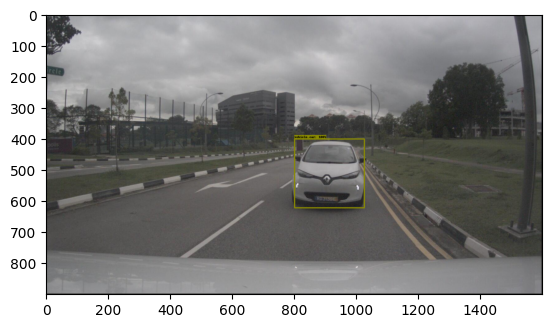

In [42]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()